In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('BostonHousing.csv')

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.shape

(506, 14)

In [ ]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
X = data.drop("medv", axis=1)
Y = data["medv"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 255.1324 - mae: 12.1704 - val_loss: 18.6897 - val_mae: 2.7129
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25.4166 - mae: 3.6089 - val_loss: 15.3102 - val_mae: 2.5861
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.3716 - mae: 2.8897 - val_loss: 14.8513 - val_mae: 2.6425
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0196 - mae: 2.6468 - val_loss: 12.4168 - val_mae: 2.2720
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.8309 - mae: 2.5965 - val_loss: 14.7658 - val_mae: 2.5316
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 11.8377 - mae: 2.6004 - val_loss: 13.2358 - val_mae: 2.4621
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.1727 - mae: 2.4122 - val_loss: 12.3091 - val_mae: 2.2466
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.1078 - mae: 2.2720 - val_loss: 12.5039 - val_mae: 2.4108
Epoch 9/100
404/404 ━━━━━━━━━━

In [ ]:
mse = model.evaluate(X_test, Y_test)
print("Mean Squared Error:", mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2754 - mae: 1.9221 
Mean Squared Error: [9.22913646697998, 2.011434555053711]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Flatten if needed (in case model outputs shape (n,1) instead of (n,))
Y_train_pred = Y_train_pred.flatten()
Y_test_pred = Y_test_pred.flatten()

# Train Metrics
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)

# Test Metrics
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

# Output
print(f"Train MSE : {train_mse:.3f} | RMSE: {train_rmse:.3f} | MAE: {train_mae:.3f} | R²: {train_r2:.3f}")
print(f"Test  MSE : {test_mse:.3f} | RMSE: {test_rmse:.3f} | MAE: {test_mae:.3f} | R²: {test_r2:.3f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Train MSE : 1.275 | RMSE: 1.129 | MAE: 0.803 | R²: 0.985
Test  MSE : 9.229 | RMSE: 3.038 | MAE: 2.011 | R²: 0.874


In [ ]:
y_pred = model.predict(X_test)
print(y_pred[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[27.087793]
 [32.778408]
 [16.252361]
 [23.309904]
 [16.797043]]


In [ ]:
print(Y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: medv, Length: 102, dtype: float64


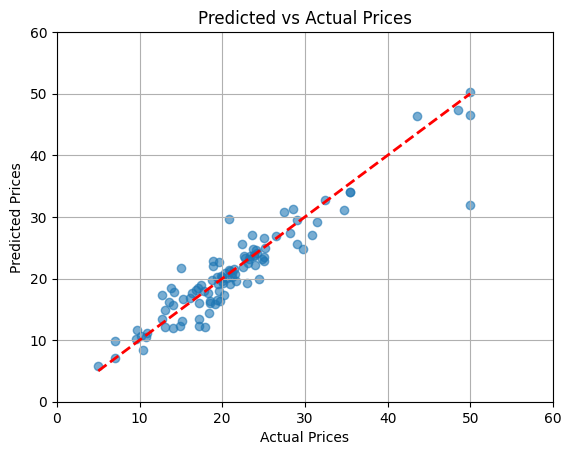

In [ ]:
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.grid()
plt.show()
